# ***EOS-ANALYSIS-2023-03:***

In [1]:
import eos
import numpy as np
import matplotlib.pyplot as plt
from logging import error, info, warn
from dynesty import utils
from numpy.random import Generator, PCG64
import argparse
from collections import OrderedDict
from eos.data import *
import os
import scipy, scipy.stats
import sys
import yaml
def kinstr_to_dict(s):
    result = {}
    for kv in s.split(', '):
        kvarray = kv.split('=')
        if len(kvarray) != 2:
            error('key/value pair {} is invalid'.format(kv))
            exit(-1)
        result.update({kvarray[0]: float(kvarray[1])})

    return result
    
def represent_ordereddict(dumper, data):
    """Hacks to allow for ordered output to YAML"""
    value = []

    for item_key, item_value in data.items():
        node_key = dumper.represent_data(item_key)
        node_value = dumper.represent_data(item_value)

        value.append((node_key, node_value))

    return yaml.nodes.MappingNode('tag:yaml.org,2002:map', value)

yaml.add_representer(OrderedDict, represent_ordereddict)

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- NumPy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights,axis=0)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights,axis=0)
    return average, np.sqrt(variance)

In [2]:
eos.__version__

'1.0.9'

## ***Plots***

### ***Threshold***

INFO:EOS:plotting "mBs"
INFO:EOS:plotting "const"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr-const/pred-lcsr-thresholds-fp"
INFO:EOS:plotting "shape"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr/pred-lcsr-thresholds-fp"
INFO:EOS:plotting "mBs"
INFO:EOS:plotting "const"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr-const/pred-lcsr-thresholds-fp"
INFO:EOS:plotting "shape"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr/pred-lcsr-thresholds-fp"
INFO:EOS:plotting "mBs"
INFO:EOS:plotting "const"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr-const/pred-lcsr-thresholds-fz"
INFO:EOS:plotting "shape"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr/pred-lcsr-thresholds-fz"
INFO:EOS:plotting "mBs"
INFO:EOS:plotting "const"
INFO:EOS:   plotting uncertainty propagation from "./data/lcsr-const/pred-lcsr-thresholds-fz"
INFO:EOS:plotting "shape"
INFO:EOS:   plotting uncertainty propagation from "./dat

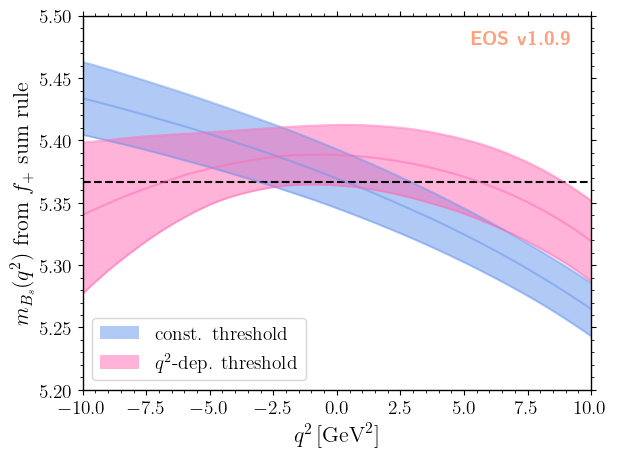

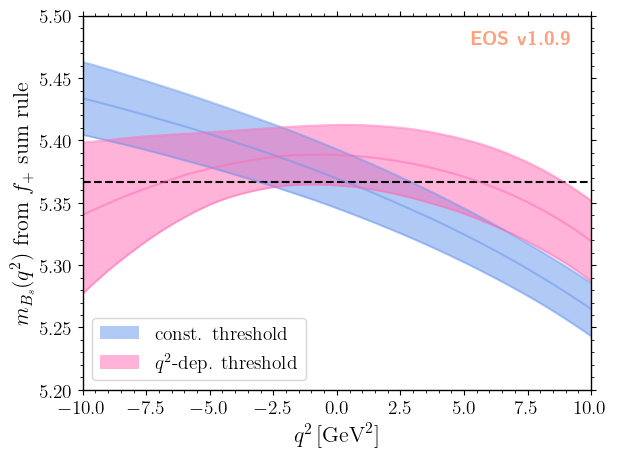

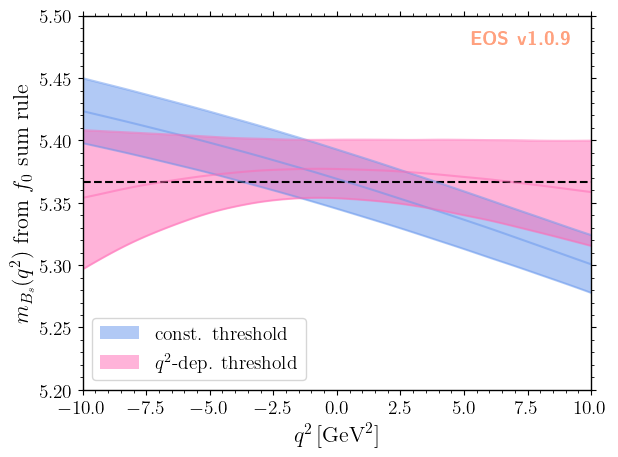

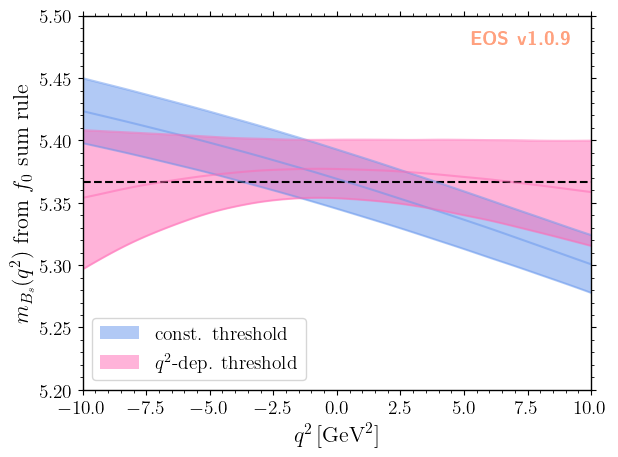

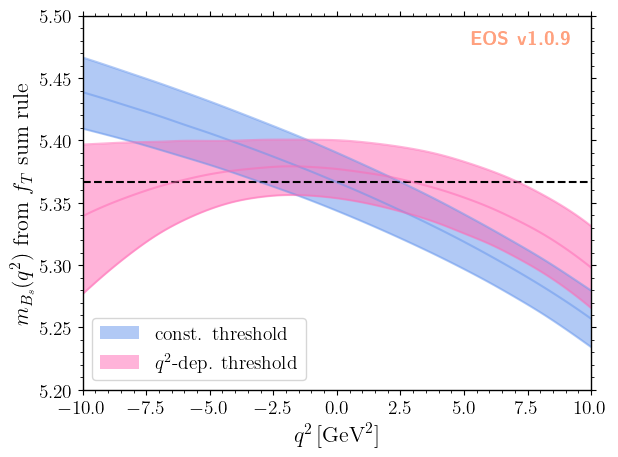

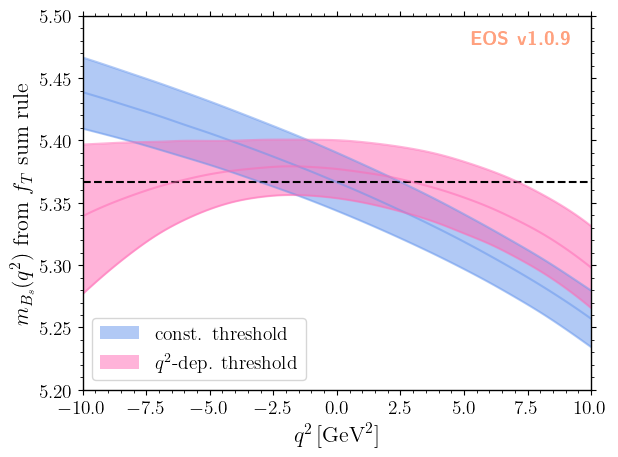

In [3]:
# DETERMINE BELOW THE PLOT YOU WANT
threshplottables = ["fp","fz","fT"]

for threshplot in threshplottables:
    threshplot_title = "$f_+$" 
    if threshplot=="fz": threshplot_title = "$f_0$" 
    if threshplot=="fT": threshplot_title = "$f_T$"

    threshplot_args = {
        'plot': {
            'title': '',
            'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-10.0, 10.0] },
            'y': { 'label': r'$m_{B_s}(q^{2})$ from '+threshplot_title+' sum rule',                    'range': [5.2, 5.5 ] },
            'legend': { 'location': 'lower left' }
        },
        'contents': [
            {
                'name': 'mBs',
                'type': 'expression',
                'color': 'black',
                'style': '--',
                'f': '5.36692'
            },
            {
                'name': 'const',
                'label': r'const. threshold',
                'type': 'uncertainty',
                'color': 'cornflowerblue',
                'opacity': 0.5,
                'data-file': './data/lcsr-const/pred-lcsr-thresholds-'+threshplot
            },
            {
                'name': 'shape',
                'label': r'$q^2$-dep. threshold',
                'type': 'uncertainty',
                'color': 'hotpink',
                'opacity': 0.5,
                'data-file': './data/lcsr/pred-lcsr-thresholds-'+threshplot
            },
            {
                'type': 'watermark'
            }
        ]
    }
    eos.plot.Plotter(threshplot_args,"figures/threshold-"+threshplot+".pdf").plot()
    eos.plot.Plotter(threshplot_args,"figures/threshold-"+threshplot+".png").plot()

### ***Saturation***

INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fp"
INFO:EOS:   prefix = pred-saturation-fp
INFO:EOS:plotting "expected"
INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fp"
INFO:EOS:   prefix = pred-saturation-fp
INFO:EOS:plotting "expected"
INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fz"
INFO:EOS:   prefix = pred-saturation-fz
INFO:EOS:plotting "expected"
INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fz"
INFO:EOS:   prefix = pred-saturation-fz
INFO:EOS:plotting "expected"
INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fT"
INFO:EOS:   prefix = pred-saturation-fT
INFO:EOS:plotting "expected"
INFO:EOS:   plotting KDE for "./data/ff-lcsr-lqcd/pred-saturation-fT"
INFO:EOS:   prefix = pred-saturation-fT
INFO:EOS:plotting "expected"


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Saturation'>)

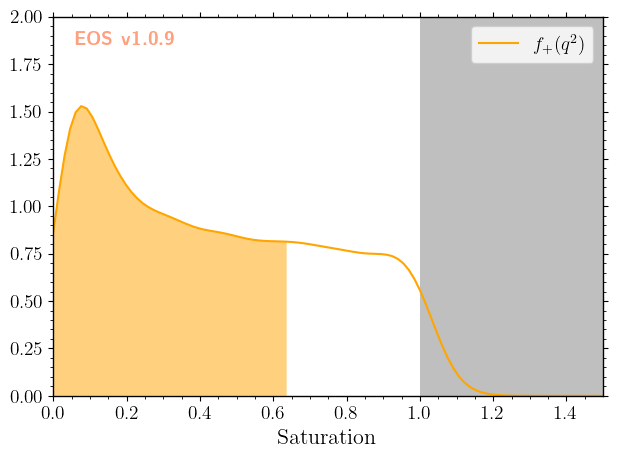

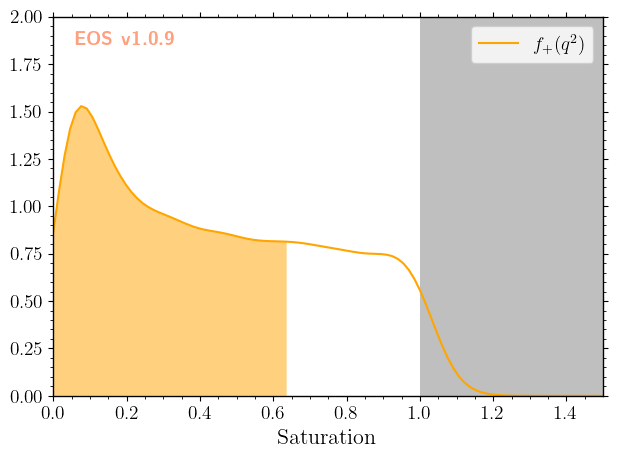

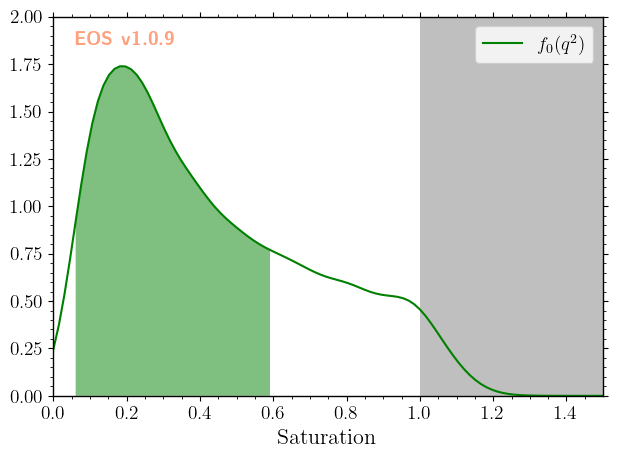

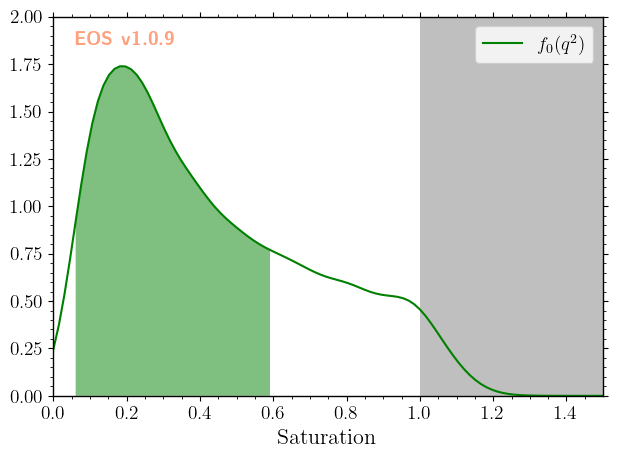

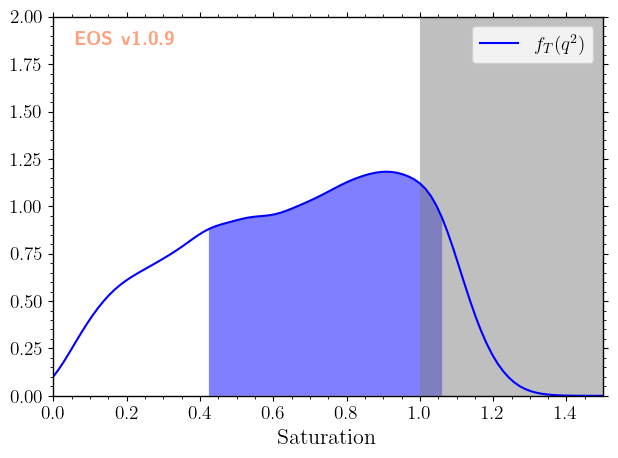

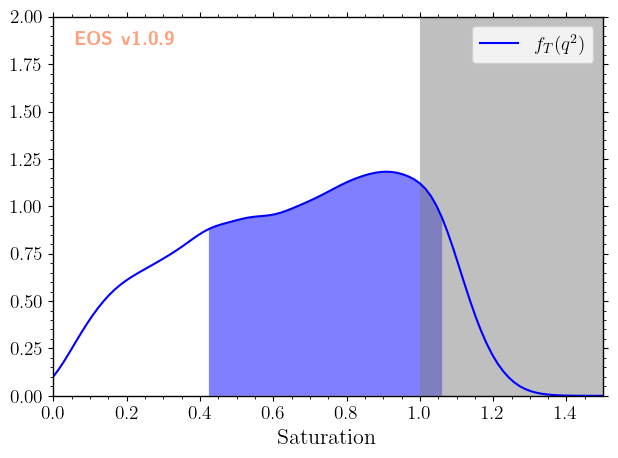

In [4]:
sat_plot_p = {
    'plot': {
        'x': {'label': r'Saturation', 'range': [0.0 , 1.5]},
        'y': {'range': [0.0,2.0]},
        'legend': {'location': 'upper right'}
    },
    'contents': [
        {
            'type': 'kde',
            'color': 'orange',
            'label': r'$f_+(q^2)$',
            'bandwidth': 1,
            'range': [0.0, 1.5],
            'variable': 'B_s->K::Saturation[1^-_V,0]',
            'data-file': './data/ff-lcsr-lqcd/pred-saturation-fp'
        },
        {
            'name': 'expected',
            'type': 'band',
            'color': 'gray',
            #'style': '--',
            'x': [1,1.5]
        },
        {
            'type': 'watermark',
            'position': ['left','top']
        }
    ]
}
eos.plot.Plotter(sat_plot_p,"figures/saturation-fp.pdf").plot()
eos.plot.Plotter(sat_plot_p,"figures/saturation-fp.png").plot()


sat_plot_z = {
    'plot': {
        'x': {'label': r'Saturation', 'range': [0.0 , 1.5]},
        'y': {'range': [0.0,2.0]},
        'legend': {'location': 'upper right'}
    },
    'contents': [
        {
            'type': 'kde',
            'color': 'green',
            'label': r'$f_0(q^2)$',
            'bandwidth': 1,
            'range': [0.0, 1.5],
            'variable': 'B_s->K::Saturation[0^+_V]',
            'data-file': './data/ff-lcsr-lqcd/pred-saturation-fz'
        },
        {
            'name': 'expected',
            'type': 'band',
            'color': 'gray',
            #'style': '--',
            'x': [1.0,1.5]
        },
        {
            'type': 'watermark',
            'position': ['left','top']
        }
    ]
}
eos.plot.Plotter(sat_plot_z,"figures/saturation-fz.pdf").plot()
eos.plot.Plotter(sat_plot_z,"figures/saturation-fz.png").plot()


sat_plot_T = {
    'plot': {
        'x': {'label': r'Saturation', 'range': [0.0 , 1.5]},
        'y': {'range': [0.0,2.0]},
        'legend': {'location': 'upper right'}
    },
    'contents': [
        {
            'type': 'kde',
            'color': 'blue',
            'label': r'$f_T(q^2)$',
            'bandwidth': 1,
            'range': [0.0, 1.5],
            'variable': 'B_s->K::Saturation[1^-_T,0]',
            'data-file': './data/ff-lcsr-lqcd/pred-saturation-fT'
        },
        {
            'name': 'expected',
            'type': 'band',
            'color': 'gray',
            #'style': '--',
            'x': [1.0,1.5]
        },
        {
            'type': 'watermark',
            'position': ['left','top']
        }
    ]
}
eos.plot.Plotter(sat_plot_T,"figures/saturation-fT.pdf").plot()
eos.plot.Plotter(sat_plot_T,"figures/saturation-fT.png").plot()


### ***Fit results***

In [5]:
eos.Observables().insert('B_s->K::pole_f_+(q2)',R'f_+(q^2) \times \left( 1 - \frac{q^2}{m_{B^*}^2} \right)', eos.Unit.Unity(), eos.Options(), '<<B_s->K::f_+(q2)>> * (1 - {q2} / <<mass::B_d^*>>^2)')
eos.Observables().insert('B_s->K::pole_f_0(q2)',R'f_0(q^2) \times \left( 1 - \frac{q^2}{m_{B^*}^2} \right)', eos.Unit.Unity(), eos.Options(), '<<B_s->K::f_0(q2)>> * (1 - {q2} / <<mass::B_d^*>>^2)')
eos.Observables().insert('B_s->K::pole_f_T(q2)',R'f_T(q^2) \times \left( 1 - \frac{q^2}{m_{B^*}^2} \right)', eos.Unit.Unity(), eos.Options(), '<<B_s->K::f_T(q2)>> * (1 - {q2} / <<mass::B_d^*>>^2)')

In [6]:
massBst = eos.Parameters()["mass::B_d^*"].evaluate()

def pole_ff_rescale(constraint: str):
    co = eos.Constraints()[constraint].serialize()
    co_data = yaml.safe_load(co)

    dim = len(co_data['observables'])
    q2list = ([co_data["kinematics"][i].get("q2") for i in range(dim)])
    meanlist = (co_data["means"])
    covlist = (co_data["covariance"])

    polefac = np.zeros((dim,))
    for i in range(dim):
        if co_data['observables'][i] == 'B_s->K::f_+(q2)' or co_data['observables'][i] == 'B_s->K::f_T(q2)': 
            polefac[i] = 1.0 - (q2list[i] / pow(massBst,2))
        else:
            polefac[i] = 1.0
    
    scale_matrix = np.diag(polefac)

    new_mean = np.matmul(scale_matrix,meanlist)
    new_cov  = np.dot(scale_matrix,np.dot(covlist,scale_matrix))

    new_constraint = OrderedDict()
    new_constraint['type'] = 'MultivariateGaussian(Covariance)'
    new_constraint['observables'] = co_data['observables']
    new_constraint['kinematics'] = co_data['kinematics']
    new_constraint['options'] = co_data['options']
    new_constraint['means'] = new_mean.tolist()
    new_constraint['covariance'] = new_cov.tolist()
    new_constraint['dof'] = dim

    position = constraint.find("@")
    new_name = constraint[:position] + "-pole-rescale" + constraint[position:]
    new_MultiVariateGaussian = yaml.dump(new_constraint)
    return new_MultiVariateGaussian

# making rescaled constraints
eos.Constraints().insert('B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A',pole_ff_rescale("B_s->K::form-factors[f_+,f_0,f_T]@BvDV:2023A"))
eos.Constraints().insert('B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A',pole_ff_rescale("B_s->K::f_++f_0@RBCUKQCD:2023"))
eos.Constraints().insert('B_s->K::f_++f_0-pole-rescale@FNAL+MILC:2019A',pole_ff_rescale("B_s->K::f_++f_0@FNALMILC:2019"))
eos.Constraints().insert('B_s->K::f_++f_0-pole-rescale@HPQCD:2014A',pole_ff_rescale("B_s->K::f_++f_0@HPQCD:2014"))

#### ***Compare analyses***

INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr/pred-bfw-fT-pole"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fT-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr/pred-bfw-fz"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lqcd/pred-bfw-fz"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fz"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr/pred-bfw-fp-pole"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lqcd/pred-bfw-fp-pole"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fp-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation 

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$f_{+}^{B_s\\rightarrow K}(q^2) \\times P(q^2,m_{B^*})$'>)

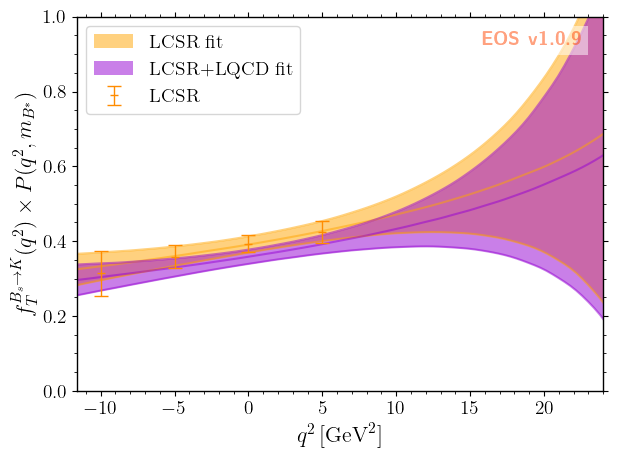

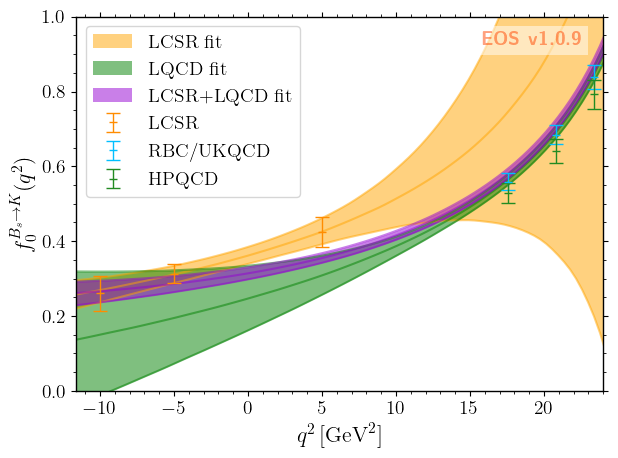

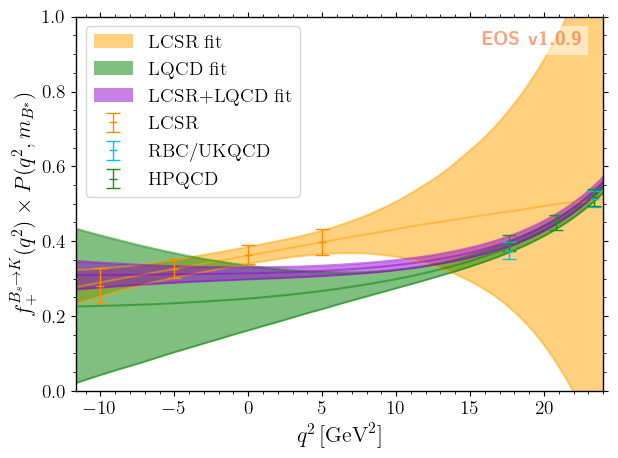

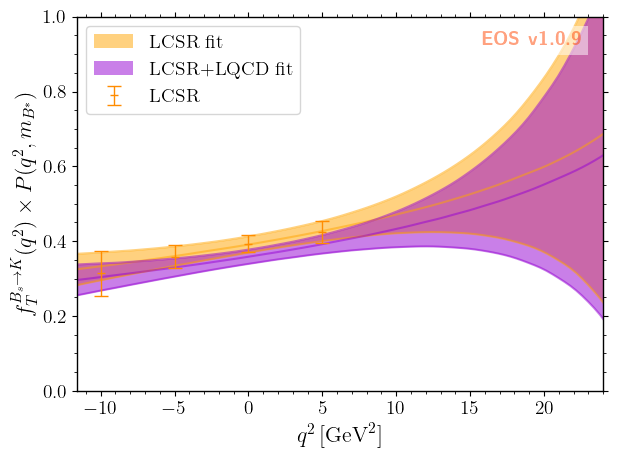

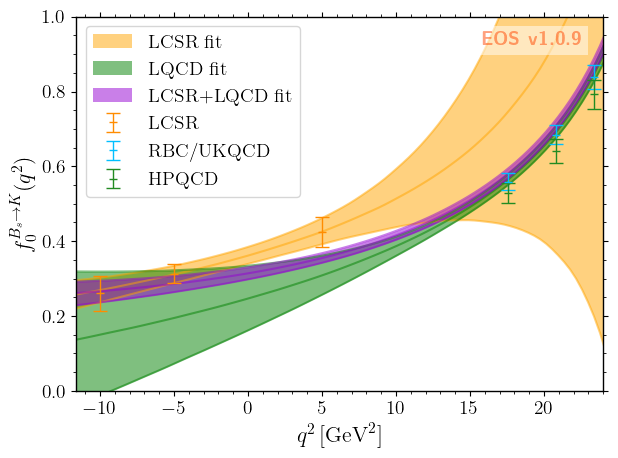

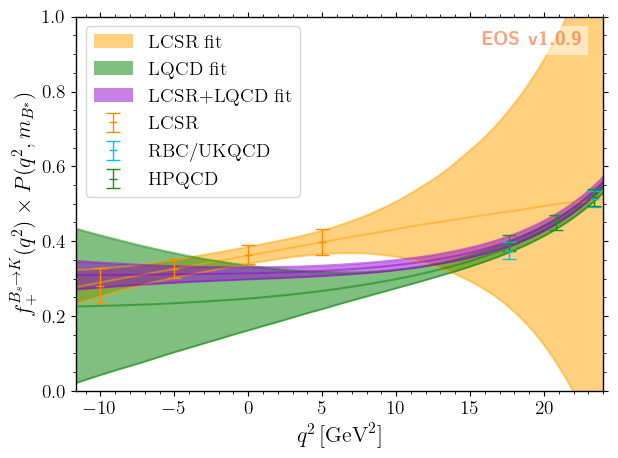

In [7]:
#Simultaneous
fp_pole_plot_args_fits = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{+}^{B_s\rightarrow K}(q^2) \times P(q^2,m_{B^*})$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'LCSR fit',
            'type': 'uncertainty',
            'color': 'orange',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr/pred-bfw-fp-pole'
        },
        {
            'label': r'LQCD fit',
            'type': 'uncertainty',
            'color': 'green',
            'opacity': 0.5,
            'data-file': './data/ff-lqcd/pred-bfw-fp-pole'
        },
        {
            'label': r'LCSR+LQCD fit',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fp-pole'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': "B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': "B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': "B_s->K::f_++f_0-pole-rescale@HPQCD:2014A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'HPQCD'
        },
        {
            'type': 'watermark'
        }
    ]
}

#Simultaneous
fz_ff_plot_args_fits = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{0}^{B_s\rightarrow K}(q^2)$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'LCSR fit', 
            'type': 'uncertainty',
            'color': 'orange',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr/pred-bfw-fz'
        },
        {
            'label': r'LQCD fit',
            'type': 'uncertainty',
            'color': 'green',
            'opacity': 0.5,
            'data-file': './data/ff-lqcd/pred-bfw-fz'
        },
        {
            'label': r'LCSR+LQCD fit', 
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fz'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': 'B_s->K::form-factors[f_+,f_0,f_T]@BvDV:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': 'B_s->K::f_++f_0@RBCUKQCD:2023',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': 'B_s->K::f_++f_0@HPQCD:2014',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'HPQCD'
        },
        {
            'type': 'watermark'
        }
    ]
}

#Simultaneous
ft_ff_plot_args_fits = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{T}^{B_s\rightarrow K}(q^2) \times P(q^2,m_{B^*})$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'LCSR fit',
            'type': 'uncertainty',
            'color': 'orange',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr/pred-bfw-fT-pole'
        },
        {
            'label': r'LCSR+LQCD fit',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fT-pole'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': 'B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_T(q2)',
            'rescale-by-width': 'true',
            'label': r'LCSR'
        },
        {
            'type': 'watermark'
        }
    ]
}
eos.plot.Plotter(ft_ff_plot_args_fits,"figures/result-fT-compare_fits.pdf").plot()
eos.plot.Plotter(fz_ff_plot_args_fits,"figures/result-fz-compare_fits.pdf").plot()
eos.plot.Plotter(fp_pole_plot_args_fits,"figures/result-fp-compare_fits.pdf").plot()
eos.plot.Plotter(ft_ff_plot_args_fits,"figures/result-fT-compare_fits.png").plot()
eos.plot.Plotter(fz_ff_plot_args_fits,"figures/result-fz-compare_fits.png").plot()
eos.plot.Plotter(fp_pole_plot_args_fits,"figures/result-fp-compare_fits.png").plot()

#### ***Compare all LQCD***

INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fz"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:plotting "ff-constraint-fnalmilc"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fp-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:plotting "ff-constraint-fnalmilc"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fz"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:plotting "ff-constraint-fnalmilc"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fp-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:plotting "ff-constraint-fnal

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$f_{+}^{B_s\\rightarrow K}(q^2) \\times P(q^2,m_{B^*})$'>)

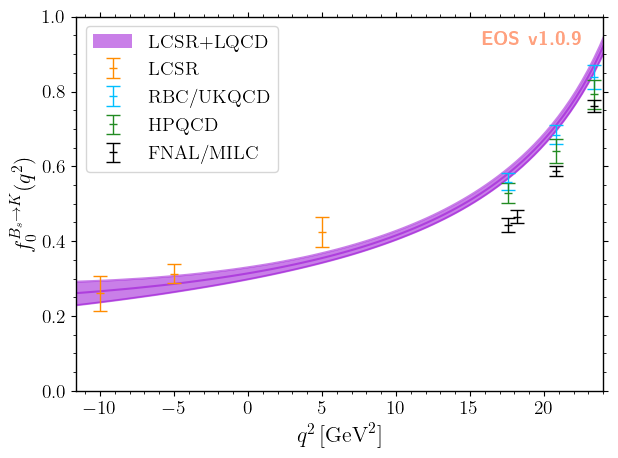

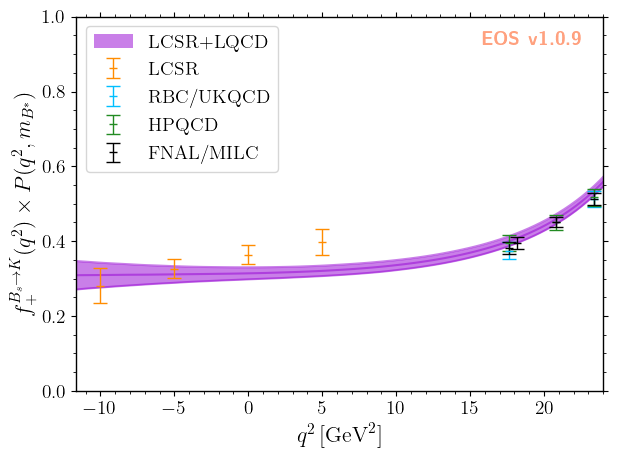

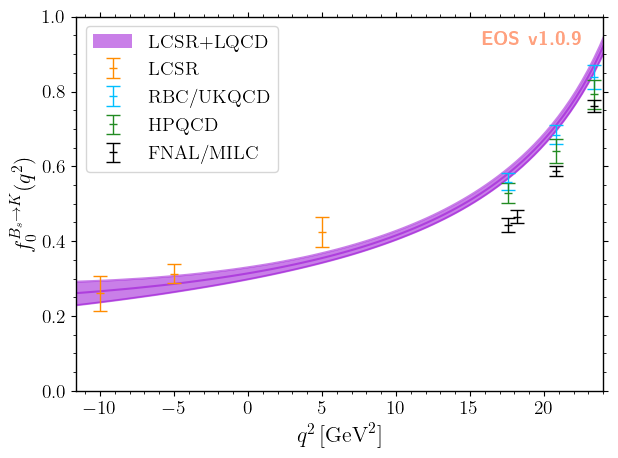

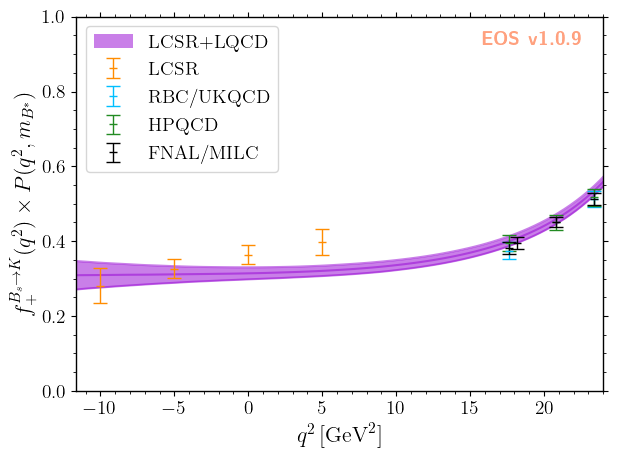

In [8]:
#Simultaneous
fp_pole_plot_args_lqcd = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{+}^{B_s\rightarrow K}(q^2) \times P(q^2,m_{B^*})$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'LCSR+LQCD',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fp-pole'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': "B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': r'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': "B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': "B_s->K::f_++f_0-pole-rescale@HPQCD:2014A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'HPQCD'
        },
        {
            'name': 'ff-constraint-fnalmilc',
            'type': 'constraint',
            'color': 'black',
            'constraints': "B_s->K::f_++f_0-pole-rescale@FNAL+MILC:2019A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': 'FNAL/MILC'
        },
        {
            'type': 'watermark'
        }
    ]
}

#Simultaneous
fz_ff_plot_args_lqcd = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{0}^{B_s\rightarrow K}(q^2)$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'LCSR+LQCD',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fz'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': 'B_s->K::form-factors[f_+,f_0,f_T]@BvDV:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': 'B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': 'B_s->K::f_++f_0-pole-rescale@HPQCD:2014A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'HPQCD'
        },
        {
            'name': 'ff-constraint-fnalmilc',
            'type': 'constraint',
            'color': 'black',
            'constraints': "B_s->K::f_++f_0-pole-rescale@FNAL+MILC:2019A",
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': 'FNAL/MILC'
        },
        {
            'type': 'watermark'
        }
    ]
}
eos.plot.Plotter(fz_ff_plot_args_lqcd,"figures/result-fz-compare_lqcd.pdf").plot()
eos.plot.Plotter(fp_pole_plot_args_lqcd,"figures/result-fp-compare_lqcd.pdf").plot()
eos.plot.Plotter(fz_ff_plot_args_lqcd,"figures/result-fz-compare_lqcd.png").plot()
eos.plot.Plotter(fp_pole_plot_args_lqcd,"figures/result-fp-compare_lqcd.png").plot()


#### ***Nominal fit only***

INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fp-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fp-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fz"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fz"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:plotting "ff-constraint-rbcukqcd"
INFO:EOS:plotting "ff-constraint-hpqcd"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-bfw-fT-pole"
INFO:EOS:plotting "ff-constraint-lcsr"
INFO:EOS:   plotting uncertainty propa

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$f_{T}^{B_s\\rightarrow K}(q^2) \\times P(q^2,m_{B^*})$'>)

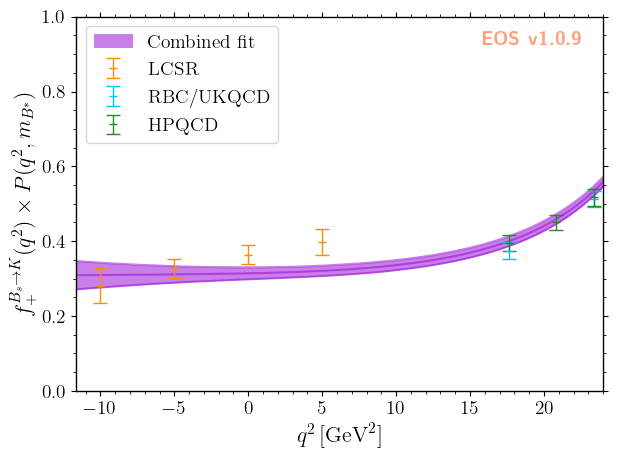

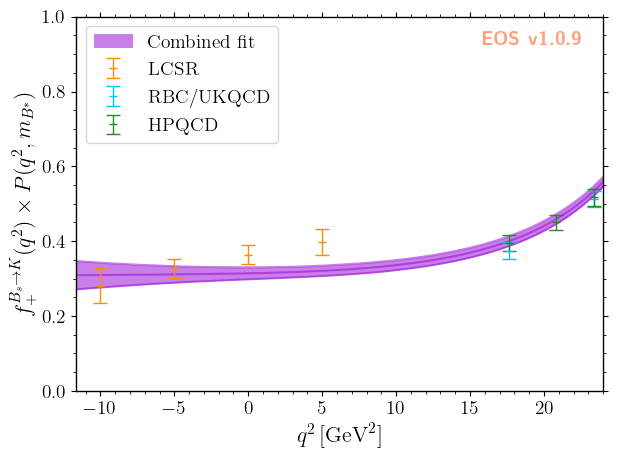

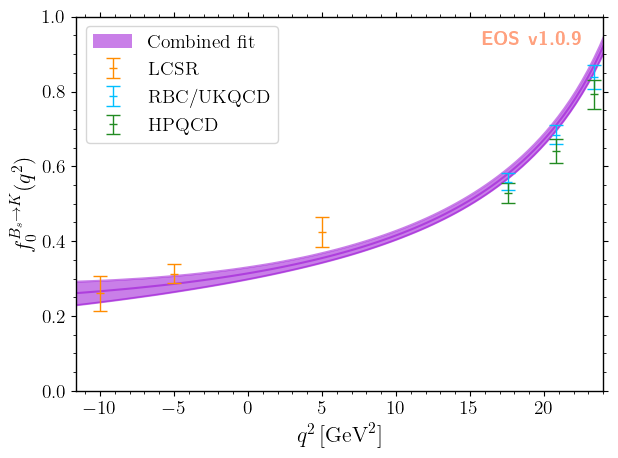

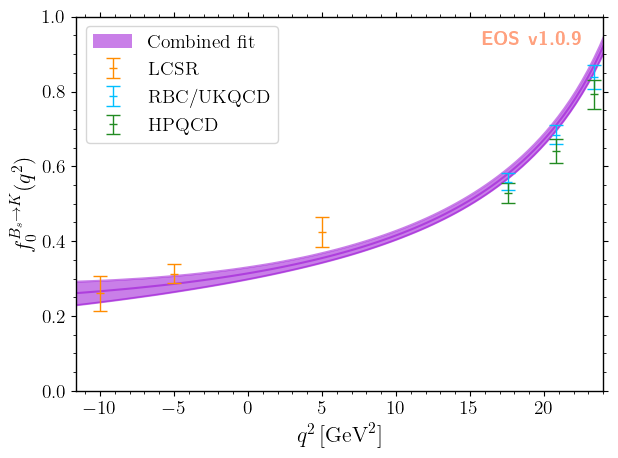

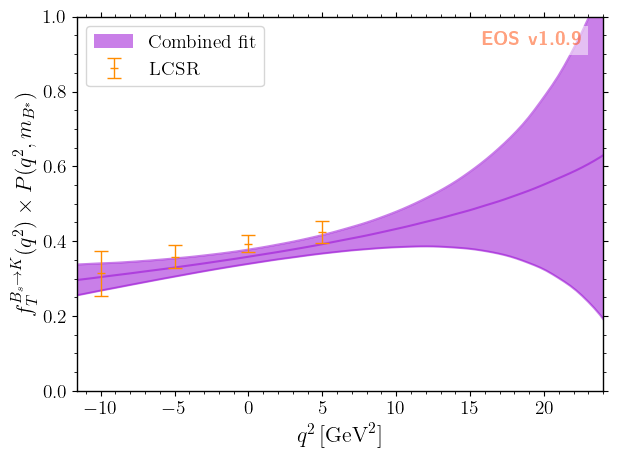

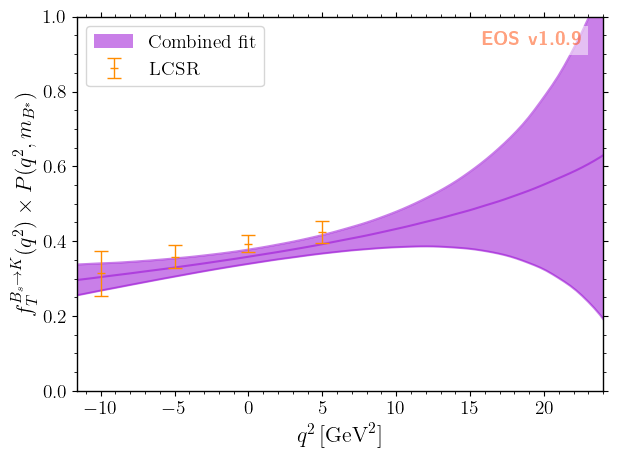

In [9]:
#Simultaneous
fp_pole_plot_args = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{+}^{B_s\rightarrow K}(q^2) \times P(q^2,m_{B^*})$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'Combined fit',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fp-pole'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': "B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': r'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': "B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': r'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': "B_s->K::f_++f_0-pole-rescale@HPQCD:2014A",
            'variable': 'q2',
            'observable': 'B_s->K::f_+(q2)',
            'rescale-by-width': 'true',
            'label': r'HPQCD'
        },
        {
            'type': 'watermark'
        }
    ]
}

#Simultaneous
fz_ff_plot_args = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{0}^{B_s\rightarrow K}(q^2)$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'Combined fit',# 
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fz'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': 'B_s->K::form-factors[f_+,f_0,f_T]@BvDV:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': r'LCSR'
        },
        {
            'name': 'ff-constraint-rbcukqcd',
            'type': 'constraint',
            'color': 'deepskyblue',
            'constraints': 'B_s->K::f_++f_0-pole-rescale@RBC+UKQCD:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': r'RBC/UKQCD'
        },
        {
            'name': 'ff-constraint-hpqcd',
            'type': 'constraint',
            'color': 'forestgreen',
            'constraints': 'B_s->K::f_++f_0-pole-rescale@HPQCD:2014A',
            'variable': 'q2',
            'observable': 'B_s->K::f_0(q2)',
            'rescale-by-width': 'true',
            'label': r'HPQCD'
        },
        {
            'type': 'watermark'
        }
    ]
}

#Simultaneous
ft_ff_plot_args = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-11.63, 24.00] },
        'y': { 'label': r"$f_{T}^{B_s\rightarrow K}(q^2) \times P(q^2,m_{B^*})$" ,            'range': [0.0, 1.0 ] },
        'legend': { 'location': 'upper left' }
    },
    'contents': [
        {
            'label': r'Combined fit',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': './data/ff-lcsr-lqcd/pred-bfw-fT-pole'
        },
        {
            'name': 'ff-constraint-lcsr',
            'type': 'constraint',
            'color': 'darkorange',
            'constraints': 'B_s->K::form-factors[f_+,f_0,f_T]-pole-rescale@BvDV:2023A',
            'variable': 'q2',
            'observable': 'B_s->K::f_T(q2)',
            'rescale-by-width': 'true',
            'label': r'LCSR'
        },
        {
            'type': 'watermark'
        }
    ]
}
eos.plot.Plotter(fp_pole_plot_args,"figures/result-fp.pdf").plot()
eos.plot.Plotter(fp_pole_plot_args,"figures/result-fp.png").plot()
eos.plot.Plotter(fz_ff_plot_args,"figures/result-fz.pdf").plot()
eos.plot.Plotter(fz_ff_plot_args,"figures/result-fz.png").plot()
eos.plot.Plotter(ft_ff_plot_args,"figures/result-fT.pdf").plot()
eos.plot.Plotter(ft_ff_plot_args,"figures/result-fT.png").plot()

### ***Decay rate***

#### ***Compare 3 analyses***

INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lqcd/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lqcd/pred-normdGammadq2"


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$|V_{ub}|^{-2}\\;\\textrm{d}\\Gamma / \\textrm{d}q^2\\;$\\,[$\\textnormal{s}^{-1}\\textnormal{GeV}^{-2}$]'>)

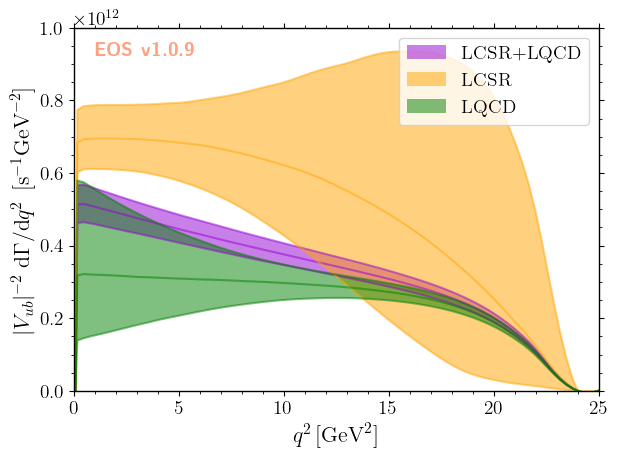

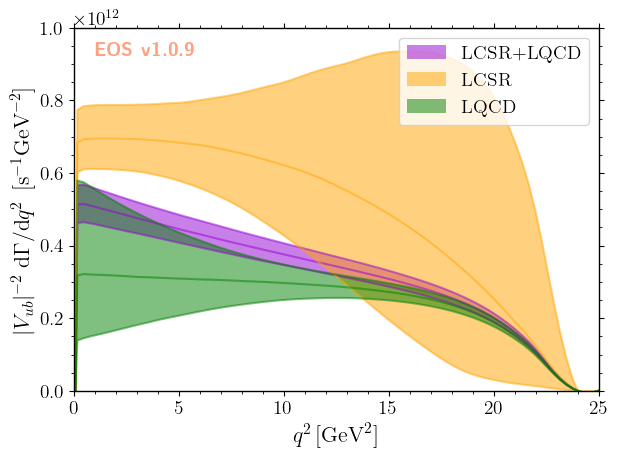

In [10]:
dGdq2_plot_args_fits = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [00.00, 25.00] },
        'y': { 'label': r"$|V_{ub}|^{-2}\;\textrm{d}\Gamma / \textrm{d}q^2\;$" , 'unit': r'$\textnormal{s}^{-1}\textnormal{GeV}^{-2}$',  'range': [0.0, 1.0e12 ] },
        'legend': { 'location': 'upper right' }
    },
    'contents': [
        {
            'label': r'LCSR+LQCD',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': "./data/ff-lcsr-lqcd/pred-normdGammadq2"
        },
        {
            'label': r'LCSR',
            'type': 'uncertainty',
            'color': 'orange',
            'opacity': 0.5,
            'data-file': "./data/ff-lcsr/pred-normdGammadq2"
        },
        {
            'label': r'LQCD',
            'type': 'uncertainty',
            'color': 'green',
            'opacity': 0.5,
            'data-file': "./data/ff-lqcd/pred-normdGammadq2"
        },
        {
            'type': 'watermark',
            'position': ['left','top']
        }
    ]
}
eos.plot.Plotter(dGdq2_plot_args_fits,"figures/dGammadq2_fits.pdf").plot()
eos.plot.Plotter(dGdq2_plot_args_fits,"figures/dGammadq2_fits.png").plot()

#### ***SM x BSM***

INFO:EOS:   plotting uncertainty propagation from "./data/bsm/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/bsm/pred-normdGammadq2"
INFO:EOS:   plotting uncertainty propagation from "./data/ff-lcsr-lqcd/pred-normdGammadq2"


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$|V_{ub}|^{-2}\\;\\textrm{d}\\Gamma / \\textrm{d}q^2\\;$\\,[$\\textnormal{s}^{-1}\\textnormal{GeV}^{-2}$]'>)

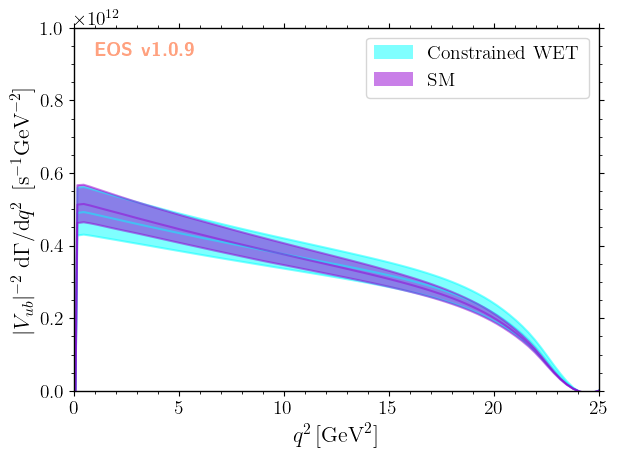

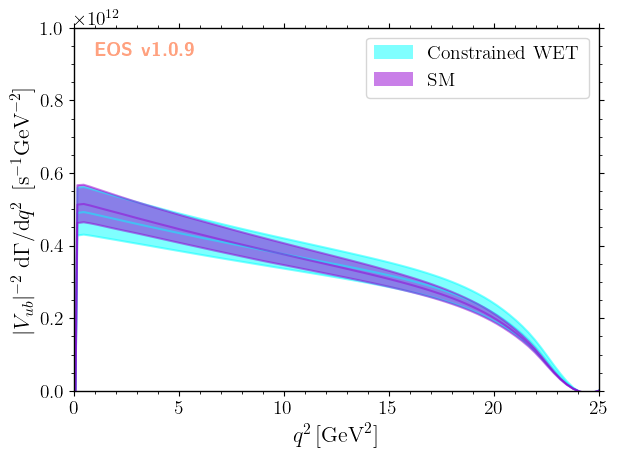

In [11]:
dGdq2_plot_args_bsm = {
    'plot': {
        #'title': r'Simultaneous fit of all $f_i$',
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [00.00, 25.00] },
        'y': { 'label': r"$|V_{ub}|^{-2}\;\textrm{d}\Gamma / \textrm{d}q^2\;$" , 'unit': r'$\textnormal{s}^{-1}\textnormal{GeV}^{-2}$',  'range': [0.0, 1.0e12 ] },
        'legend': { 'location': 'upper right' }
    },
    'contents': [
        {
            'label': r'Constrained WET',
            'type': 'uncertainty',
            'color': 'cyan',
            'opacity': 0.5,
            'data-file': "./data/bsm/pred-normdGammadq2"
        },
        {
            'label': r'SM',
            'type': 'uncertainty',
            'color': 'darkviolet',
            'opacity': 0.5,
            'data-file': "./data/ff-lcsr-lqcd/pred-normdGammadq2"
        },
        {
            'type': 'watermark',
            'position': ['left','top']
        }
    ]
}
eos.plot.Plotter(dGdq2_plot_args_bsm,"figures/dGammadq2_bsm.pdf").plot()
eos.plot.Plotter(dGdq2_plot_args_bsm,"figures/dGammadq2_bsm.png").plot()

### ***Comparison of all determinations***

/tmp/ipykernel_1075005/2601338778.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ay[0].set_yticklabels(labels[::-1])
/tmp/ipykernel_1075005/2601338778.py:22: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ay[0].get_shared_y_axes().join(ay[0], ay[1])


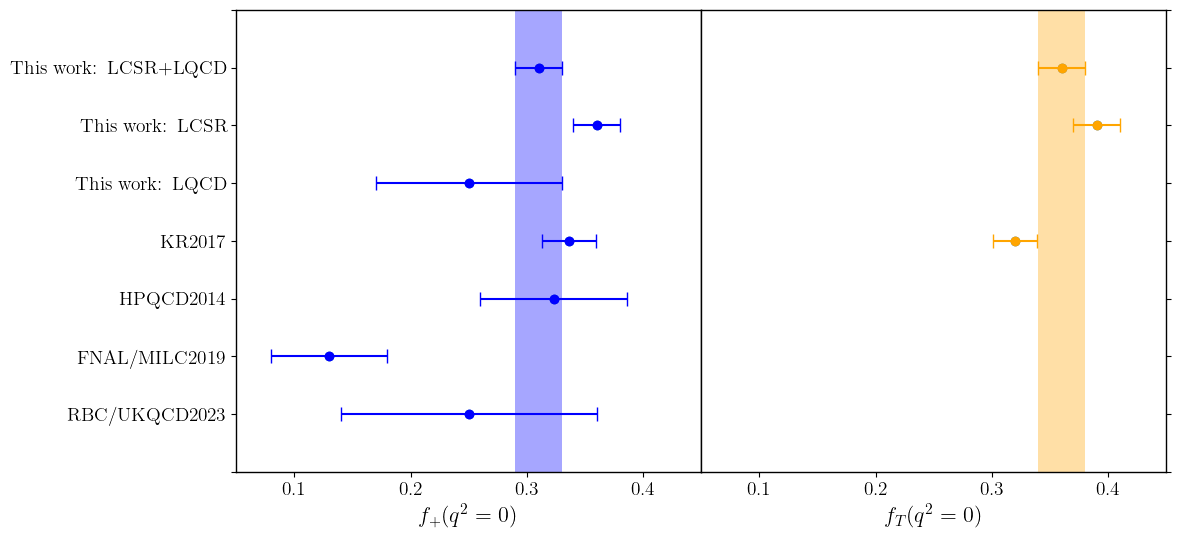

In [12]:


from matplotlib.patches import Rectangle
fig, ay = plt.subplots(ncols=2,sharey='col',figsize=(12,6))
fig.canvas.draw()

labels = [" ","This work: LCSR+LQCD", "This work: LCSR", "This work: LQCD",
   "KR2017", "HPQCD2014", "FNAL/MILC2019", "RBC/UKQCD2023"," "]

yvals = [7,6,5,4,3,2,1]
fpvals = [0.31,0.36,0.25,0.336,0.323,0.13,0.25]
fperrs = [0.02,0.02,0.08,0.023,0.063,0.05,0.11]
fTvals = [0.36,0.39,0,0.320,0,0,0]
fTerrs = [0.02,0.02,0,0.019,0,0,0]

ay[0].scatter(fpvals, yvals)
ay[1].scatter(fTvals, yvals)

ay[0].add_patch(Rectangle((fpvals[0]-fperrs[0],0),2*fperrs[0],8,facecolor="blue", alpha=0.35))
ay[1].add_patch(Rectangle((fTvals[0]-fTerrs[0],0),2*fTerrs[0],8,facecolor="orange", alpha=0.35))

ay[0].set_yticklabels(labels[::-1])
ay[1].set_yticklabels([])
ay[0].get_shared_y_axes().join(ay[0], ay[1])
ay[0].set_xlim([0.05,0.45])
ay[1].set_xlim([0.05,0.45])
ay[0].set_ylim([0,8])
ay[1].set_ylim([0,8])
ay[0].set_xlabel(r"$f_+(q^2=0)$")
ay[1].set_xlabel(r"$f_T(q^2=0)$")

ay[0].errorbar(fpvals, yvals, xerr=fperrs, fmt="o",color="blue")
ay[1].errorbar(fTvals, yvals, xerr=fTerrs, fmt="o",color="orange")

ay[1].yaxis.tick_right()

plt.subplots_adjust(wspace=0.0,hspace=0.4)

plt.savefig('figures/compare_ff_q20.pdf')
plt.savefig('figures/compare_ff_q20.png') 
plt.show()

## ***Numerical***

### ***LCSR pseudo-data points***

In [15]:
lcsr_co = eos.Constraints()["B_s->K::form-factors[f_+,f_0,f_T]@BvDV:2023A"].serialize()
lcsr_co_data = yaml.safe_load(lcsr_co)
lcsr_obs = lcsr_co_data["observables"]
lcsr_kin = lcsr_co_data["kinematics"]
lcsr_dim = len(lcsr_obs)
lcsr_cov = lcsr_co_data["covariance"]
lcsr_avg = lcsr_co_data["means"]

for i in range(lcsr_dim):
    print(lcsr_obs[i]+f"\tq2={lcsr_kin[i].get('q2'):.0f}\t{lcsr_avg[i]:.3f}\tpm {np.sqrt(lcsr_cov[i][i]):.3f}")


B_s->K::f_+(q2)	q2=-10	0.208	pm 0.035
B_s->K::f_+(q2)	q2=-5	0.278	pm 0.022
B_s->K::f_+(q2)	q2=0	0.364	pm 0.026
B_s->K::f_+(q2)	q2=5	0.483	pm 0.042
B_s->K::f_0(q2)	q2=-10	0.261	pm 0.047
B_s->K::f_0(q2)	q2=-5	0.312	pm 0.025
B_s->K::f_0(q2)	q2=5	0.426	pm 0.040
B_s->K::f_T(q2)	q2=-10	0.232	pm 0.044
B_s->K::f_T(q2)	q2=-5	0.305	pm 0.027
B_s->K::f_T(q2)	q2=0	0.393	pm 0.023
B_s->K::f_T(q2)	q2=5	0.516	pm 0.035


### ***Comparison of 3 fits***

In [16]:
with open("ff-lcsr-lqcd/pred-bfw-fp/description.yaml") as stream:
    hm = yaml.safe_load(stream)

dim_q2_ff = len(hm["observables"])
q2list = np.zeros(dim_q2_ff,dtype=float)
for i in range(dim_q2_ff): q2list[i] = hm["observables"][i]["kinematics"].get("q2")

In [22]:
fitfile = eos.AnalysisFile('ff-bs-to-k.yaml')

#posteriors = list(fitfile.posteriors.keys())
#predictions_ff = list(fitfile.predictions.keys())

analysed = dict()
q2_0_index = 0
for i in range(len(q2list)): 
    if q2list[i]==0: q2_0_index = i
def analyse_fits(posterior:str):
    analysed[posterior] = dict()
    analysis = fitfile.analysis(posterior)

    # best-fit point: 
    #   determined from initial point which
    #   maximizes the log likelihood of the fit
    dyname=eos.data.DynestyResults(posterior+'/dynesty_results')
    index = np.argmax(dyname.results['logl'])
    startpoint = dyname.results['samples'][index]
    loglBFP, loglGOF = eos.find_mode(fitfile,posterior,start_point=startpoint)

    # saturation at bpf
    for p, v in zip(analysis.varied_parameters, loglBFP.point):
        p.set(v)
    logl_sat_fp_obs = fitfile.observables(posterior,'saturation-fp',analysis.parameters)
    logl_sat_fz_obs = fitfile.observables(posterior,'saturation-fz',analysis.parameters)
    logl_sat_fT_obs = fitfile.observables(posterior,'saturation-fT',analysis.parameters)
    satfp_bfp = np.array([o.evaluate() for o in logl_sat_fp_obs])
    satfz_bfp = np.array([o.evaluate() for o in logl_sat_fz_obs])
    satfT_bfp = np.array([o.evaluate() for o in logl_sat_fT_obs])

    # weighted average and std of ff at q2=0
    pred_fp = eos.data.Prediction(posterior+'/pred-bfw-fp')
    pred_fz = eos.data.Prediction(posterior+'/pred-bfw-fz')
    pred_fT = eos.data.Prediction(posterior+'/pred-bfw-fT')
    pred_fp_samples = pred_fp.samples
    pred_fz_samples = pred_fz.samples
    pred_fT_samples = pred_fT.samples
    pred_fp_weights = pred_fp.weights
    pred_fz_weights = pred_fz.weights
    pred_fT_weights = pred_fT.weights
    fz_0_avg , fz_0_std = weighted_avg_and_std(pred_fz_samples[:,q2_0_index],pred_fz_weights)
    fp_0_avg , fp_0_std = weighted_avg_and_std(pred_fp_samples[:,q2_0_index],pred_fp_weights)
    fT_0_avg , fT_0_std = weighted_avg_and_std(pred_fT_samples[:,q2_0_index],pred_fT_weights)

    analysed[posterior]['gof_logl'] = loglGOF
    analysed[posterior]['bfp_logl'] = loglBFP
    analysed[posterior]['sat_f0_bfp'] = satfz_bfp
    analysed[posterior]['sat_f+_bfp'] = satfp_bfp
    analysed[posterior]['sat_fT_bfp'] = satfT_bfp
    analysed[posterior]['f0(q2=0)_avg'] = fz_0_avg
    analysed[posterior]['f+(q2=0)_avg'] = fp_0_avg
    analysed[posterior]['fT(q2=0)_avg'] = fT_0_avg
    analysed[posterior]['f0(q2=0)_std'] = fz_0_std
    analysed[posterior]['f+(q2=0)_std'] = fp_0_std
    analysed[posterior]['fT(q2=0)_std'] = fT_0_std
    return analysed[posterior]

In [23]:
from IPython.display import Markdown
def printmd(string,color='red'):
    display(Markdown("<span style='color:{}'>***{}***</span>".format(color,string)))

preselecposts = ["ff-lcsr-lqcd","ff-lcsr","ff-lqcd"]

for posterior in preselecposts:
    analyse_fits(posterior)
    if posterior == "ff-lcsr-lqcd": printmd("Analysis: LCSR+LQCD")
    if posterior == "ff-lcsr":      printmd("Analysis: LCSR")
    if posterior == "ff-lqcd":      printmd("Analysis: LQCD")
    print("GOF max logL starting point:")
    display(analysed[posterior]['gof_logl'])
    print("\nSaturations:")
    print(f"bfp:\tf+:{analysed[posterior]['sat_f+_bfp'][0]:.2f}\t\tf0:{analysed[posterior]['sat_f0_bfp'][0]:.2f}\t\tfT:{analysed[posterior]['sat_fT_bfp'][0]:.2f}")
    print("\nForm factors at q2=0:")
    print(f"f+\t{analysed[posterior]['f+(q2=0)_avg']:.2f}\tpm {analysed[posterior]['f+(q2=0)_std']:.2f}")
    print(f"f0\t{analysed[posterior]['f0(q2=0)_avg']:.2f}\tpm {analysed[posterior]['f0(q2=0)_std']:.2f}")
    print(f"fT\t{analysed[posterior]['fT(q2=0)_avg']:.2f}\tpm {analysed[posterior]['fT(q2=0)_std']:.2f}")
    print("\n\n\n")

INFO:EOS:Creating analysis with 14 priors, 3 EOS-wide constraints, 1 global options, 3 manually-entered constraints and 0 fixed parameters.


Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('ff-lcsr-lqcd/mode-defau…

<span style='color:red'>***Analysis: LCSR+LQCD***</span>

GOF max logL starting point:


INFO:EOS:Creating analysis with 14 priors, 1 EOS-wide constraints, 1 global options, 3 manually-entered constraints and 0 fixed parameters.



Saturations:
bfp:	f+:1.01		f0:0.34		fT:1.00

Form factors at q2=0:
f+	0.31	pm 0.02
f0	0.31	pm 0.02
fT	0.36	pm 0.02






Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('ff-lcsr/mode-default',)…

INFO:EOS:Creating analysis with 14 priors, 1 EOS-wide constraints, 1 global options, 3 manually-entered constraints and 0 fixed parameters.
INFO:EOS:Starting minimization in 3 points
INFO:EOS:Starting optimization from user-provided point
INFO:EOS:Optimization goal achieved after 958 function evaluations
INFO:EOS:Optimization goal achieved after 26 function evaluations
INFO:EOS:Minimization finished, best point is:
INFO:EOS:  - B_s->K::a^f+_0@BFW2010 -> 0.0242454546807902
INFO:EOS:  - B_s->K::a^f+_1@BFW2010 -> -0.061459803478039476
INFO:EOS:  - B_s->K::a^f+_2@BFW2010 -> 0.2076661493207148
INFO:EOS:  - B_s->K::a^f+_3@BFW2010 -> -0.9204504448801172
INFO:EOS:  - B_s->K::a^f+_4@BFW2010 -> -0.18038396892975472
INFO:EOS:  - B_s->K::a^f0_1@BFW2010 -> -0.07285478709314108
INFO:EOS:  - B_s->K::a^f0_2@BFW2010 -> 0.15681023899298308
INFO:EOS:  - B_s->K::a^f0_3@BFW2010 -> -0.8471560674663675
INFO:EOS:  - B_s->K::a^f0_4@BFW2010 -> -0.5010356001206486
INFO:EOS:  - B_s->K::a^fT_0@BFW2010 -> 0.0508122

<span style='color:red'>***Analysis: LCSR***</span>

GOF max logL starting point:


INFO:EOS:Creating analysis with 9 priors, 2 EOS-wide constraints, 1 global options, 3 manually-entered constraints and 5 fixed parameters.



Saturations:
bfp:	f+:0.93		f0:1.00		fT:1.00

Form factors at q2=0:
f+	0.36	pm 0.02
f0	0.36	pm 0.02
fT	0.39	pm 0.02






Accordion(children=(Output(layout=Layout(height='200px', overflow='auto')),), titles=('ff-lqcd/mode-default',)…

INFO:EOS:Creating analysis with 9 priors, 2 EOS-wide constraints, 1 global options, 3 manually-entered constraints and 5 fixed parameters.
INFO:EOS:Starting minimization in 3 points
INFO:EOS:Starting optimization from user-provided point
INFO:EOS:Minimization finished, best point is:
INFO:EOS:  - B_s->K::a^f+_0@BFW2010 -> 0.017086053046464267
INFO:EOS:  - B_s->K::a^f+_1@BFW2010 -> -0.05497968548947452
INFO:EOS:  - B_s->K::a^f+_2@BFW2010 -> 0.0014286443657032244
INFO:EOS:  - B_s->K::a^f+_3@BFW2010 -> -0.04112253790554288
INFO:EOS:  - B_s->K::a^f+_4@BFW2010 -> 0.6666612695065173
INFO:EOS:  - B_s->K::a^f0_1@BFW2010 -> -0.05562321074653409
INFO:EOS:  - B_s->K::a^f0_2@BFW2010 -> -0.23741404917814646
INFO:EOS:  - B_s->K::a^f0_3@BFW2010 -> -0.33602606481924924
INFO:EOS:  - B_s->K::a^f0_4@BFW2010 -> -0.5850672528371856
INFO:EOS:total chi^2 = 5.74
INFO:EOS:total dof   = 2
INFO:EOS:p value     = 5.66%
INFO:EOS:individual test statistics:
INFO:EOS:  - B_s->K::f_++f_0@HPQCD:2014: chi^2 / dof = 5.5

<span style='color:red'>***Analysis: LQCD***</span>

GOF max logL starting point:



Saturations:
bfp:	f+:0.45		f0:0.52		fT:0.00

Form factors at q2=0:
f+	0.25	pm 0.08
f0	0.25	pm 0.08
fT	0.00	pm 0.00




